In [1]:
import os
import git
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt

ROOT_DIR =  Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
SAVE_FIGS = True

In [2]:
os.chdir(os.path.join(ROOT_DIR, "utilities"))
from testing import * # If MATLAB is not installed, open utilities and set to False
from plotting import *
from reporting import *
# plots_path = os.path.join(ROOT_DIR, "publication", "paper", "draft_plots")
plots_path = os.path.join(ROOT_DIR, "publication", "paper", "final_plots", "results")
main_df = main_df.copy()
main_df_all = main_df.copy()
np.random.seed(0)
name_mapping = {'syntheticMRI3Dfull': 'syntheticMRI3D',
                'syntheticMRI2Daxial': 'syntheticMRI2D (axial)',
                'syntheticMRI2Dsagittal': 'syntheticMRI2D (sagittal)',
                'syntheticMRI2Dcoronal': 'syntheticMRI2D (coronal)',
                'spaceNetfull': 'spaceNet',
                'cocoindoor': 'coco (indoor)',
                'cocooutdoor': 'coco (outdoor)',
                'pastisfull': 'pastis',
                'segmentAnythingfull': 'segmentAnything',
                'agriVisionfull': 'agriVision',
                'standardTestingfull': 'classical'}

main_df['dataset'] = (main_df['dataset'] + main_df['subset']).replace(name_mapping)
main_df['dataset'].value_counts()

dataset
agriVision                   344
segmentAnything              340
coco (outdoor)               328
coco (indoor)                326
spaceNet                     320
pastis                       300
classical                    117
syntheticMRI2D (axial)        63
syntheticMRI2D (coronal)      63
syntheticMRI2D (sagittal)     63
syntheticMRI3D                42
Name: count, dtype: int64

# KS Stat (r, eta) & (r, 1/beta) Point Plots

In [3]:
fontsize = 20
markersize = 30
labelsize = 15
markertypes = ['x', 'D', 'o', '+']
labels = ['GenGamma', 'Laplace', 'Gaussian', 'Student-t', r'$\alpha\geq0.05$', r'$\alpha\geq0.10$']
points = [Line2D([0], [0], color='k', linestyle='', marker=m, markersize=10) for m in markertypes] + [
    Rectangle((0, 0), 1, 1, color='black', alpha=0.1),
    Rectangle((0, 0), 1, 1, color='black', alpha=0.3),
]

color_palette = {
    'gray': 'xkcd:gray',
    'green': 'xkcd:shamrock green',
    'red': 'xkcd:light red',
    'blue': 'xkcd:blue',
}

fit_cat_palette = {
    'actually_pass': 'green',
    'practically_pass': 'xkcd:pastel orange',
    'borderline': 'xkcd:golden yellow',
    'interesting_failure': 'xkcd:light red',
    'trivial_failure': 'red'
}

transform_palette = {
    'wavelet': 'xkcd:light purple',
    'fourier': 'xkcd:red',
     'gabor' : 'xkcd:yellow orange',
    'learned': 'xkcd:marine blue'
}

temp = main_df.copy().sort_values(['failure_category', 'transform'])#[((main_df['channel'] == 'gray') | (main_df['channel'].isna()))] 

fontsize=30
r_valid = (temp['best_r'].min() - 0.05, temp['best_r'].max())
eta_valid = (-1.5, 20)
xlims = (r_valid[0] - 0.1, r_valid[1] + 0.1)
eta_lims = (-3, 21)
ylims = (eta_valid[0] - 0.1, eta_valid[1] + 0.1)

r_roi = (temp['best_r'].min() - 0.5, temp['best_r'].max())
eta_roi = (-0.1, 0.1)
log_scale = True

r_vals = np.linspace(r_valid[0], r_valid[1], 1001)
beta_vals_above = (1.5 + eta_valid[1]) / r_vals
beta_vals_below = (1.5 + (-1.4)) / r_vals

r_vals_roi = np.linspace(r_roi[0], r_roi[1], 1001)
r_vals_roi = np.where(r_vals_roi == 0, 1e-10, r_vals_roi)  # Replace zero with a small positive value
beta_vals_roi_above = (3 / (2 * r_vals_roi) / 0.1)
beta_vals_roi_below = (3 / (2 * r_vals_roi) * (-0.1))

r_shade_roi = np.linspace(*r_roi, 100)
eta_shade_roi = np.linspace(*eta_roi, 100)

# Define Region of Interest borders in r-eta space
x_border = [r_shade_roi[0], r_shade_roi[-1], r_shade_roi[-1], r_shade_roi[0], r_shade_roi[0]]
y_border = [eta_shade_roi[0], eta_shade_roi[0], eta_shade_roi[-1], eta_shade_roi[-1], eta_shade_roi[0]]

# Calculate Region of Interest borders in r-(1/beta) space
beta_border = (np.array(y_border) + 1.5) / np.array(x_border)
x_border_beta = x_border
y_border_beta = beta_border

In [4]:
pastis_region_data = main_df[(main_df['dataset'] == 'pastis') & (main_df['transform'] == 'fourier') 
                             & (main_df['channel'] == 'gray') & (main_df['group'] == 2)].iloc[0]
spaceNet_region_data = main_df[(main_df['dataset'] == 'spaceNet') & (main_df['transform'] == 'wavelet') 
                               & (main_df['orientation'] == 'horizVert') & (main_df['channel'] == 'gray') 
                               & (main_df['group'] == 6)].iloc[0]


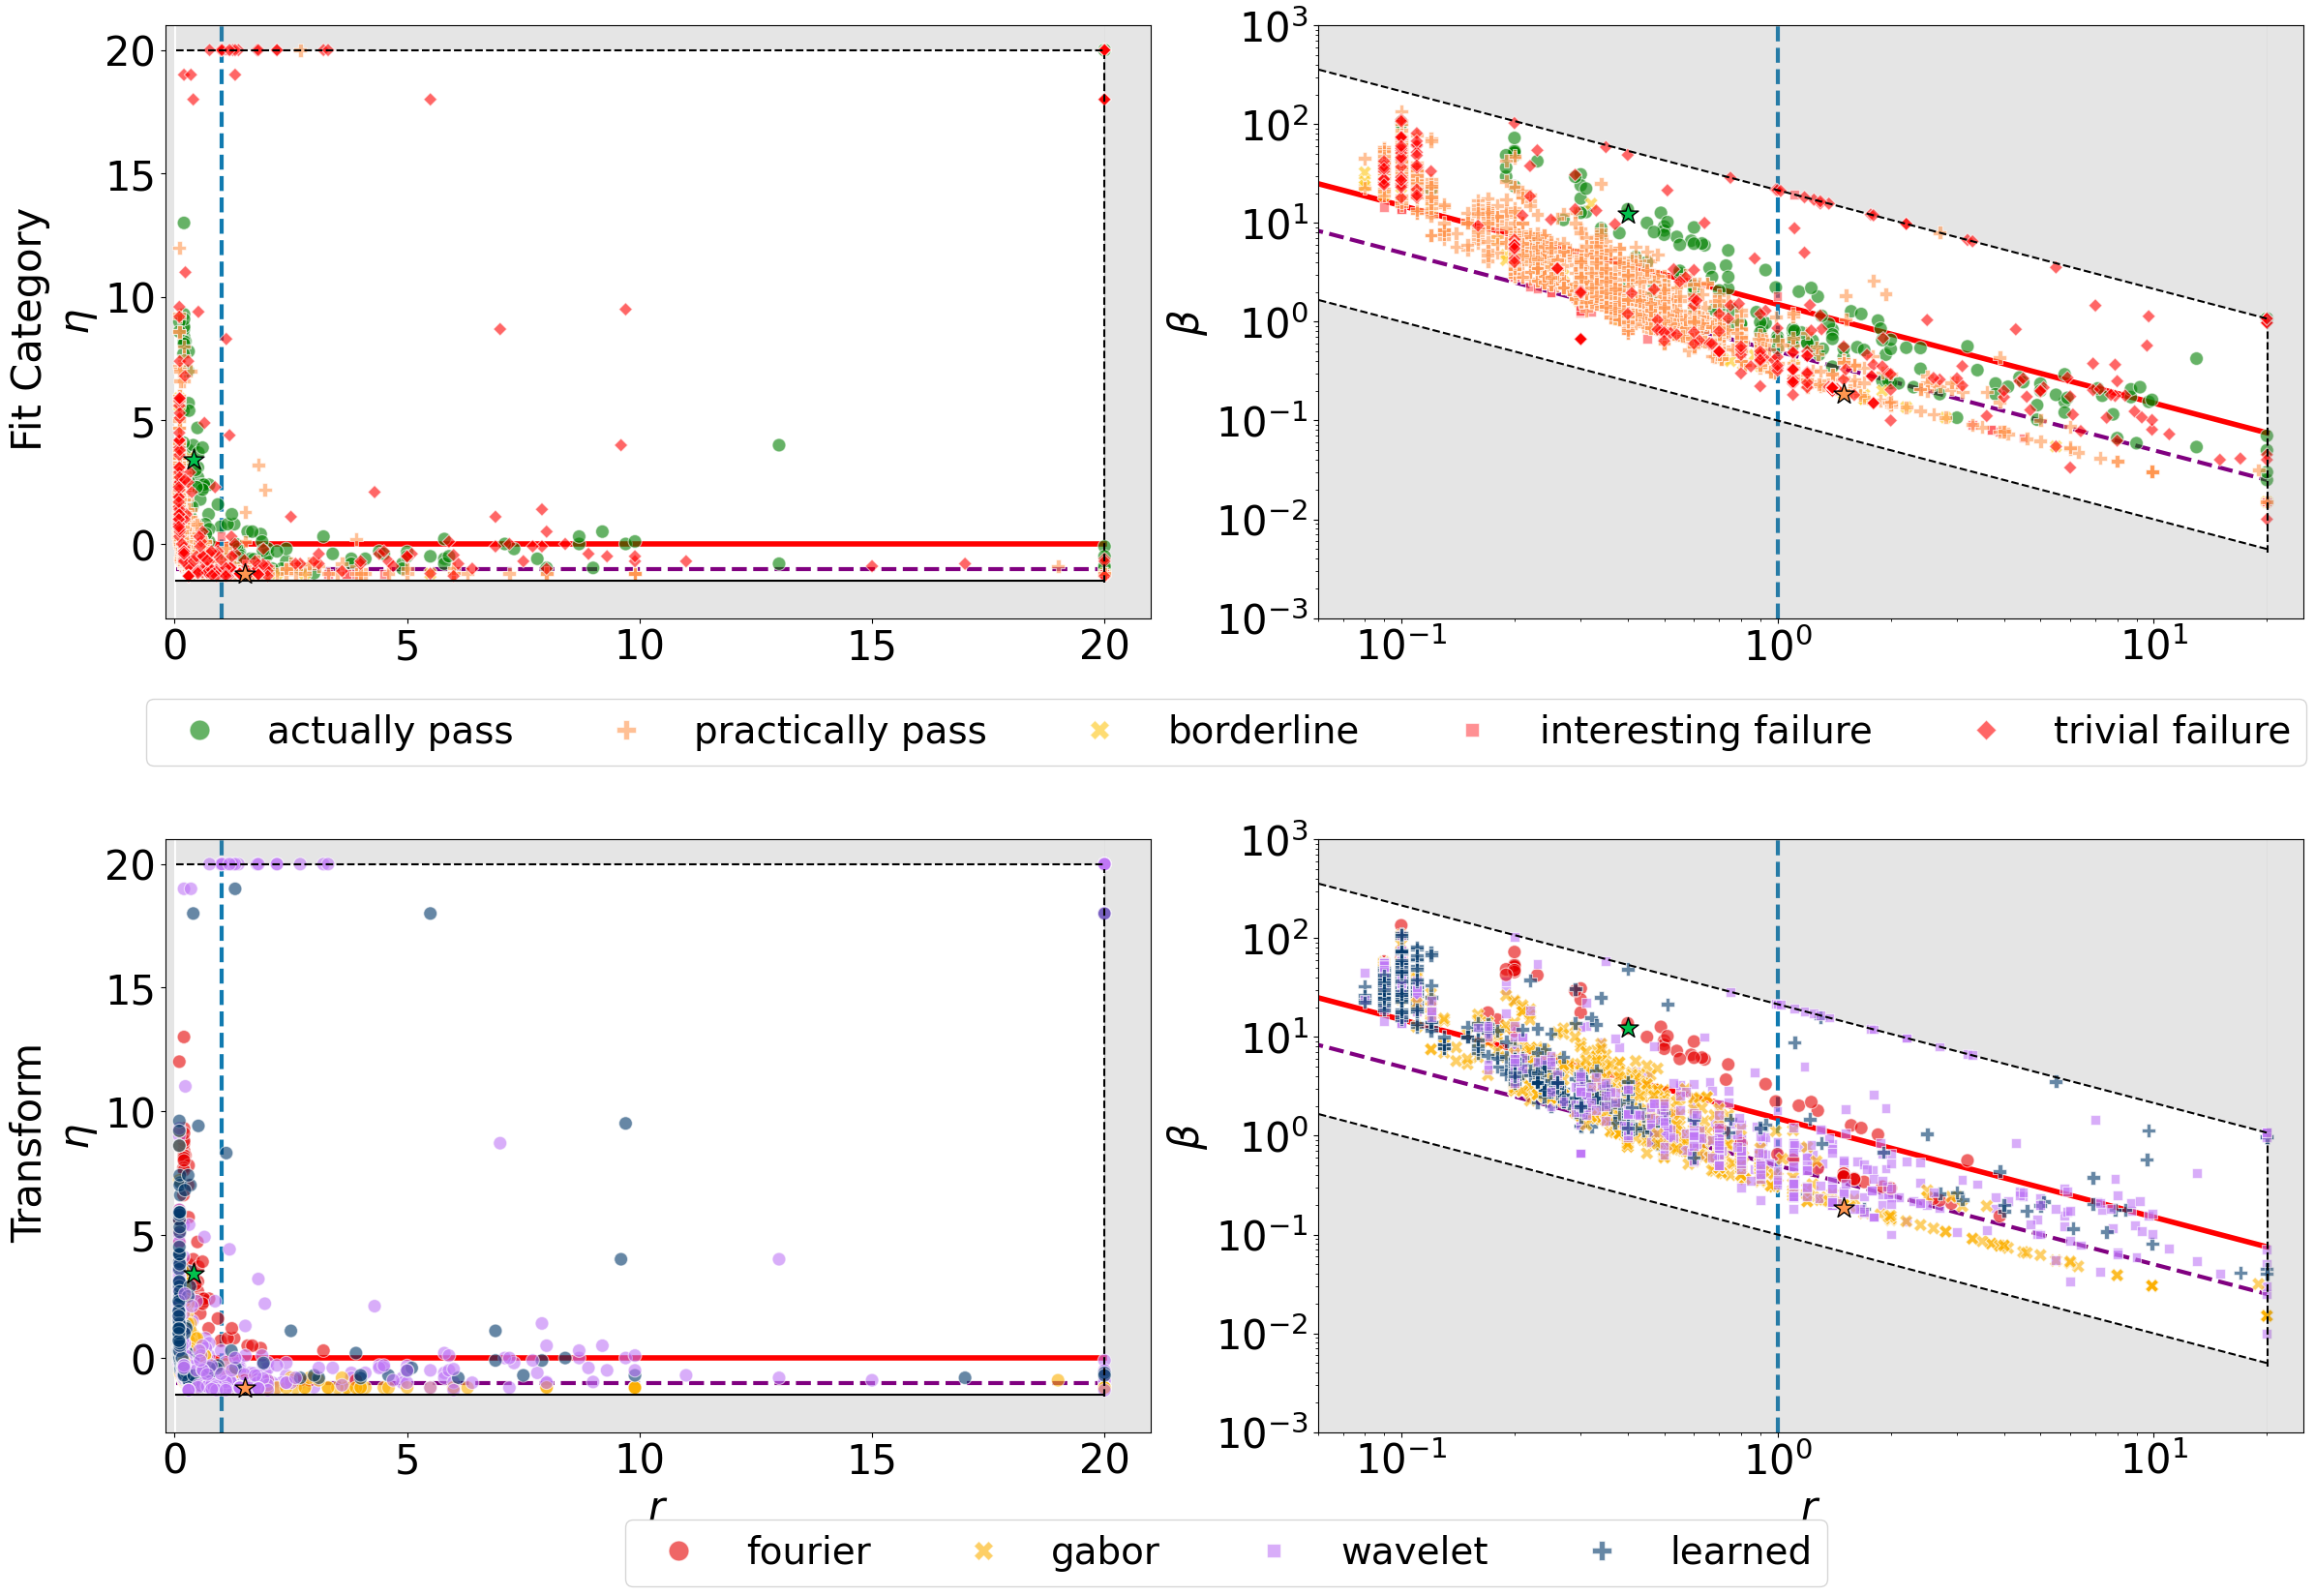

In [5]:
category_1 = 'failure_category'
category_2 = 'transform'

fig, axes = plt.subplots(2, 2, figsize=(24, 16))

# First row, first plot: r-eta space with failure categories
axes[0, 0].fill_between(r_vals, y1=eta_lims[0], y2=eta_valid[0], color='gray', alpha=0.2, ec=None)
axes[0, 0].fill_between(r_vals, y1=eta_valid[1], y2=21, color='gray', alpha=0.2, ec=None)
sns.lineplot(x=r_vals, y=0, color='red', ax=axes[0, 0], linewidth=4, zorder=0)
sns.lineplot(x=r_vals, y=-1, color='purple', ax=axes[0, 0], linestyle='--', linewidth=3, zorder=0)
sns.lineplot(x=[20, 20], y=[-1.5, 20], color='black', ax=axes[0, 0], linestyle='--')
axes[0, 0].axvline(x=20, ymin=0.06, ymax=0.95, color='black', linestyle='dashed')
axes[0, 0].fill_betweenx(y=eta_lims, x1=20, x2=25, color='gray', alpha=0.2, ec=None)
axes[0, 0].fill_betweenx(y=[-5, 1e3], x1=-2, x2=0, color='gray', alpha=0.2, ec=None)
axes[0, 0].axvline(x=1, color='xkcd:nice blue', linestyle='dashed', alpha=1, linewidth=3, zorder=0)
sns.lineplot(x=r_vals, y=eta_valid[0], color='black', ax=axes[0, 0])
sns.lineplot(x=r_vals, y=eta_valid[1], color='black', ax=axes[0, 0], linestyle="--")
sns.scatterplot(data=temp, x='best_r', y='best_eta', hue=category_1, ax=axes[0, 0], alpha=0.6, s=100, palette=fit_cat_palette, style=category_1)
axes[0, 0].scatter(pastis_region_data['best_r'], pastis_region_data['best_eta'], color='xkcd:shamrock green', marker='*', s=250, zorder=10, ec='black')
axes[0, 0].scatter(spaceNet_region_data['best_r'], spaceNet_region_data['best_eta'], color='xkcd:pastel orange', marker='*', s=250, zorder=10, ec='black')

axes[0, 0].set_xlabel(" ", fontsize=fontsize)
axes[0, 0].set_ylabel("Fit Category \n" + r"$\eta$", fontsize=fontsize)
axes[0, 0].set_ylim(eta_lims)
axes[0, 0].set_xlim((-0.2, 21))
axes[0, 0].tick_params(axis='both', which='major', labelsize=fontsize)
axes[0, 0].legend(markerscale=1.5, fontsize=10, loc='center right').set_visible(False)

# First row, second plot: r-(1/beta) space with failure categories
axes[0, 1].fill_between(r_vals, ylims[0], beta_vals_below, color='gray', alpha=0.2, ec=None)
sns.lineplot(x=r_vals, y=beta_vals_above, color='black', ax=axes[0, 1], linestyle="--")
sns.lineplot(x=r_vals, y=beta_vals_below, color='black', ax=axes[0, 1], linestyle="--")
axes[0, 1].fill_between(r_vals, y1=beta_vals_above, y2=beta_vals_above[0]+1e3, color='gray', alpha=0.2, ec=None)
sns.lineplot(x=r_vals, y=1.5 / r_vals, color='red', ax=axes[0, 1], linewidth=4, zorder=0)
sns.lineplot(x=r_vals, y=(1.5 - 1) / r_vals, color='purple', ax=axes[0, 1], linestyle='--', linewidth=3, zorder=0)
axes[0, 1].axvline(x=1, color='xkcd:nice blue', linestyle='dashed', linewidth=3, alpha=1, zorder=0)
sns.scatterplot(data=temp, x='best_r', y='best_beta', hue=category_1, ax=axes[0, 1], alpha=0.6, s=100, palette=fit_cat_palette, style=category_1)
axes[0, 1].axvline(x=20.1, ymin=0.11, ymax=0.49, color='black', linestyle='dashed')
axes[0, 1].fill_betweenx(y=[-1.4, 1e3], x1=20, x2=1e2, color='gray', alpha=0.2, ec=None)
axes[0, 1].scatter(pastis_region_data['best_r'], pastis_region_data['best_beta'], color='xkcd:shamrock green', marker='*', s=250, zorder=10, ec='black')
axes[0, 1].scatter(spaceNet_region_data['best_r'], spaceNet_region_data['best_beta'], color='xkcd:pastel orange', marker='*', s=250, zorder=10, ec='black')


axes[0, 1].set_xlabel(" \n \n ", fontsize=fontsize)
axes[0, 1].set_ylabel(r'$\beta$', fontsize=fontsize)
axes[0, 1].set_xlim((0.06, 25))
axes[0, 1].set_ylim((0.001, 1e3))
axes[0, 1].tick_params(axis='both', which='major', labelsize=fontsize)
if log_scale:
    axes[0, 1].set_xscale('log')
    axes[0, 1].set_yscale('log')

handles_fit, labels_fit = axes[0, 0].get_legend_handles_labels()
labels_fit = [l.replace("_", " ") for l in labels_fit]

desired_order_fit = ['actually pass', 'practically pass', 'borderline', 'interesting failure', 'trivial failure']
label_handle_map_fit = dict(zip(labels_fit, handles_fit))

labels_fit = [label for label in desired_order_fit if label in label_handle_map_fit]
handles_fit = [label_handle_map_fit[label] for label in labels_fit]

fig.legend(
    handles_fit, 
    labels_fit, 
    markerscale=1.5, 
    fontsize=fontsize-2, 
    loc='lower center', 
    bbox_to_anchor=(0.53, 0.49), 
    ncol=5
)

axes[0, 1].legend().set_visible(False)
axes[0, 0].legend().set_visible(False)

# Second row, first plot: r-eta space with dataset_types

axes[1, 0].fill_between(r_vals, y1=eta_lims[0], y2=eta_valid[0], color='gray', alpha=0.2, ec=None)
axes[1, 0].fill_between(r_vals, y1=eta_valid[1], y2=21, color='gray', alpha=0.2, ec=None)
sns.lineplot(x=r_vals, y=0, color='red', ax=axes[1, 0], linewidth=4, zorder=0)
sns.lineplot(x=r_vals, y=-1, color='purple', ax=axes[1, 0], linestyle='--', linewidth=3, zorder=0)
sns.lineplot(x=[20, 20], y=[-1.5, 20], color='black', ax=axes[1, 0], linestyle='--')
axes[1, 0].axvline(x=20, ymin=0.06, ymax=0.95, color='black', linestyle='dashed')
axes[1, 0].fill_betweenx(y=eta_lims, x1=20, x2=25, color='gray', alpha=0.2, ec=None)
axes[1, 0].fill_betweenx(y=[-5, 1e3], x1=-2, x2=0, color='gray', alpha=0.2, ec=None)

axes[1, 0].axvline(x=1, color='xkcd:nice blue', linestyle='dashed', alpha=1, linewidth=3, zorder=0)
sns.lineplot(x=r_vals, y=eta_valid[0], color='black', ax=axes[1, 0])
sns.lineplot(x=r_vals, y=eta_valid[1], color='black', ax=axes[1, 0], linestyle="--")
sns.scatterplot(data=temp, x='best_r', y='best_eta', hue=category_2, ax=axes[1, 0], alpha=0.6, s=100, palette=transform_palette)
axes[1, 0].scatter(pastis_region_data['best_r'], pastis_region_data['best_eta'], color='xkcd:shamrock green', marker='*', s=250, zorder=10, ec='black')
axes[1, 0].scatter(spaceNet_region_data['best_r'], spaceNet_region_data['best_eta'], color='xkcd:pastel orange', marker='*', s=250, zorder=10, ec='black')


axes[1, 0].set_xlabel(r"$r$", fontsize=fontsize)
axes[1, 0].set_ylabel(f"{category_2.capitalize()} \n" + r"$\eta$", fontsize=fontsize)
axes[1, 0].set_ylim(eta_lims)
axes[1, 0].set_xlim((-0.2, 21))
axes[1, 0].tick_params(axis='both', which='major', labelsize=fontsize)
axes[1, 0].legend(markerscale=1.5, fontsize=10, loc='center right').set_visible(False)

# Second row, second plot: r-(1/beta) space with failure categories
axes[1, 1].fill_between(r_vals, ylims[0], beta_vals_below, color='gray', alpha=0.2, ec=None)
sns.lineplot(x=r_vals, y=beta_vals_above, color='black', ax=axes[1, 1], linestyle="--")
sns.lineplot(x=r_vals, y=beta_vals_below, color='black', ax=axes[1, 1], linestyle="--")
axes[1, 1].fill_between(r_vals, y1=beta_vals_above, y2=beta_vals_above[0]+1e3, color='gray', alpha=0.2, ec=None)
sns.lineplot(x=r_vals, y=1.5 / r_vals, color='red', ax=axes[1, 1], linewidth=4, zorder=0)
sns.lineplot(x=r_vals, y=(1.5 - 1) / r_vals, color='purple', ax=axes[1, 1], linestyle='--', linewidth=3, zorder=0)
axes[1, 1].axvline(x=1, color='xkcd:nice blue', linestyle='dashed', linewidth=3, alpha=1, zorder=0)
sns.scatterplot(data=temp, x='best_r', y='best_beta', hue=category_2, ax=axes[1, 1], alpha=0.6, s=100, style=category_2, palette=transform_palette)
axes[1, 1].axvline(x=20.1, ymin=0.11, ymax=0.49, color='black', linestyle='dashed')
axes[1, 1].fill_betweenx(y=[-1.4, 1e3], x1=20, x2=1e3, color='gray', alpha=0.2, ec=None)
axes[1, 1].scatter(pastis_region_data['best_r'], pastis_region_data['best_beta'], color='xkcd:shamrock green', marker='*', s=250, zorder=10, ec='black')
axes[1, 1].scatter(spaceNet_region_data['best_r'], spaceNet_region_data['best_beta'], color='xkcd:pastel orange', marker='*', s=250, zorder=10, ec='black')

axes[1, 1].set_xlabel(r"$r$", fontsize=fontsize)
axes[1, 1].set_ylabel(r'$\beta$', fontsize=fontsize)
axes[1, 1].set_xlim((0.06, 25))
axes[1, 1].set_ylim((0.001, 1e3))
axes[1, 1].tick_params(axis='both', which='major', labelsize=fontsize)
if log_scale:
    axes[1, 1].set_xscale('log')
    axes[1, 1].set_yscale('log')
    
handles, labels = axes[1, 1].get_legend_handles_labels()
fig.legend(
    handles, 
    labels, 
    markerscale=1.5, 
    fontsize=fontsize-2, 
    loc='lower center', 
    bbox_to_anchor=(0.53, -0.04), 
    ncol=5
)
axes[1, 1].legend().set_visible(False)
axes[1, 0].legend().set_visible(False)

plt.subplots_adjust(hspace=0.9)
plt.tight_layout()
plt.show()

if SAVE_FIGS:
    save_path = os.path.join(plots_path, f"fit_category_{category_2}_point_plot.jpg")
    fig.savefig(save_path, dpi=DPI, bbox_inches='tight')


## Aggregate KS statistics

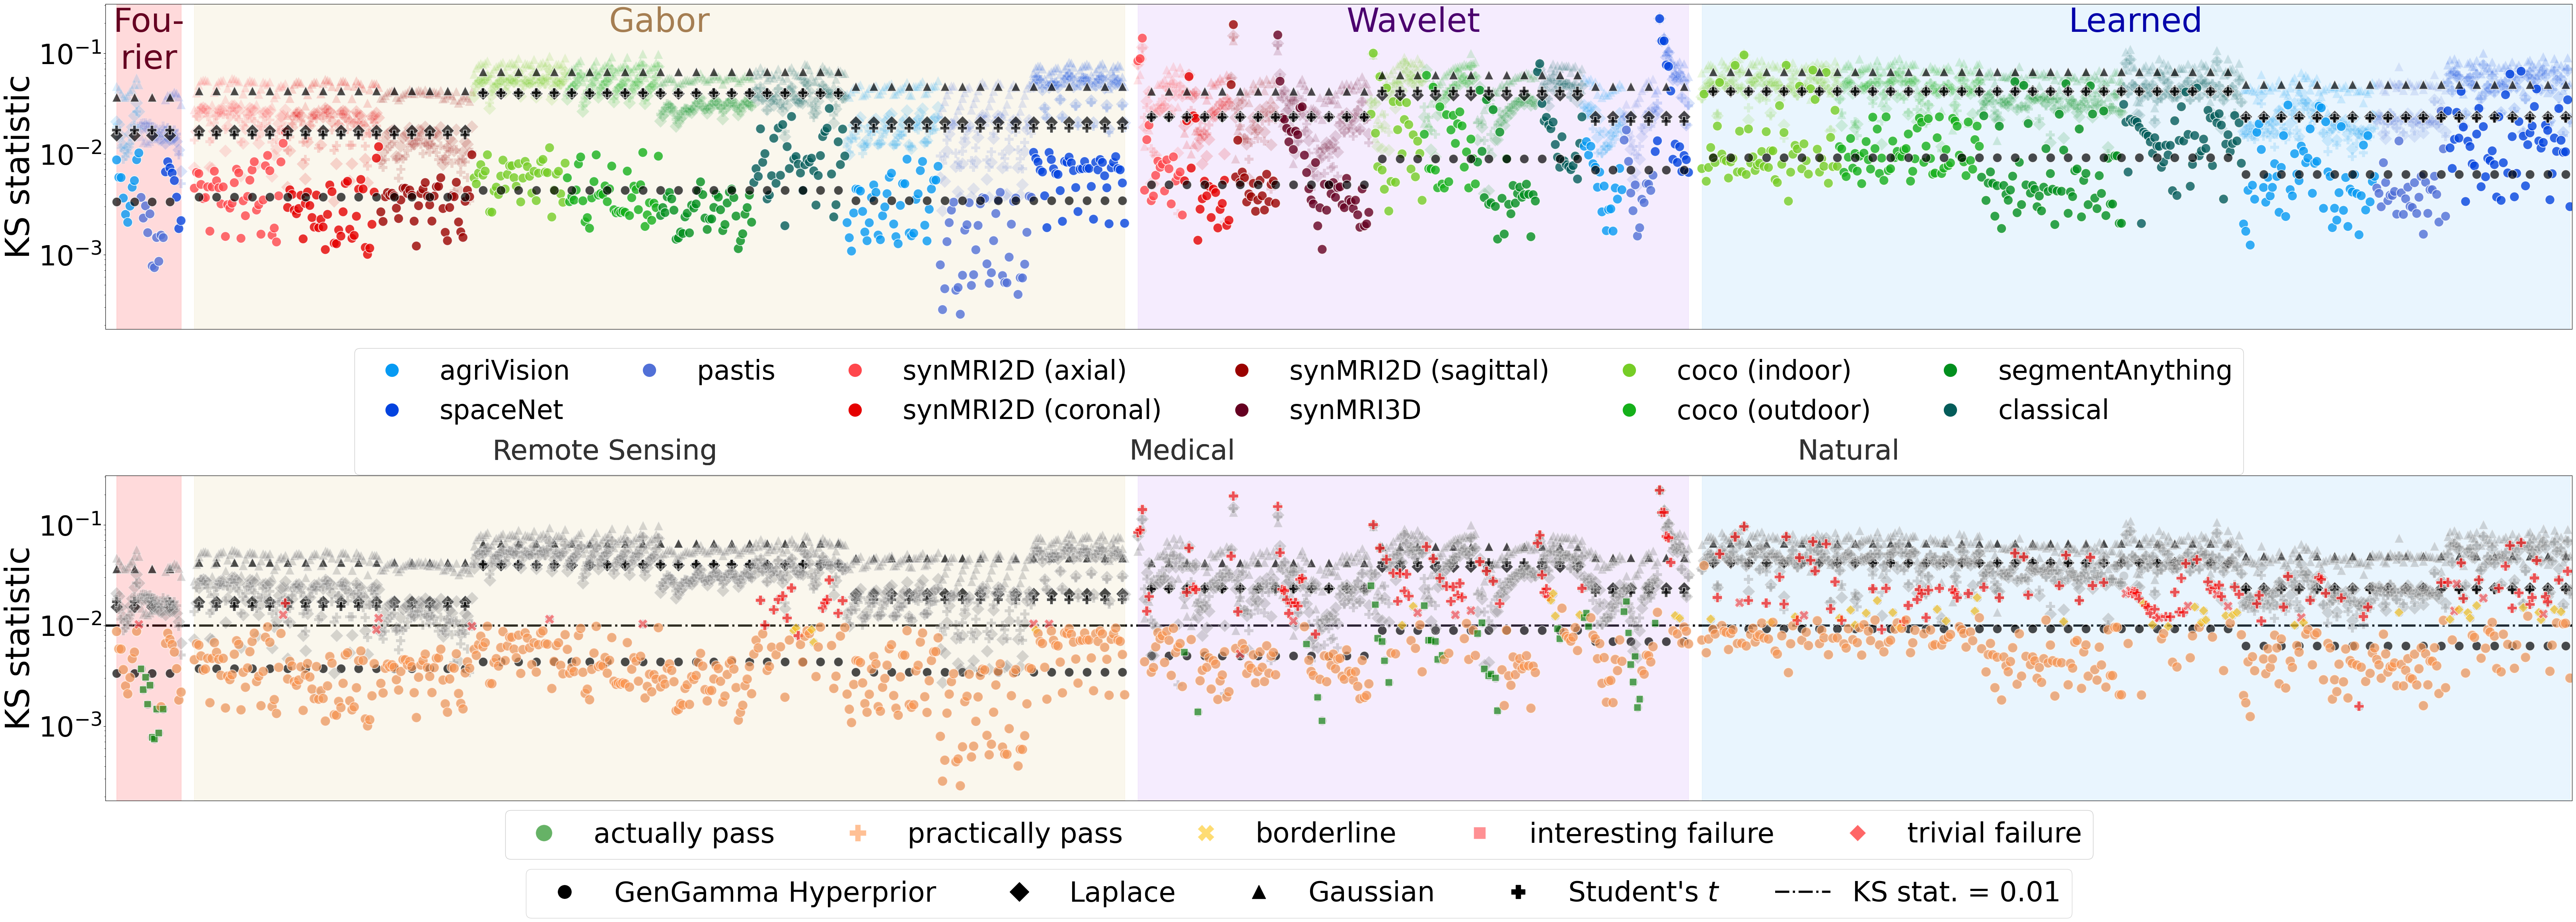

In [6]:

marker_size = 280
fontsize = 50

priors = [
    'kstest_stat_gaussian',
    'kstest_stat_laplace',
    'kstest_stat_t',
    'kstest_stat_best'
]

prior_markers = {
    'kstest_stat_gaussian': '^',
    'kstest_stat_laplace': 'D',
    'kstest_stat_t': 'P',
    'kstest_stat_best': 'o'
}

dataset_palette = {
    'agriVision': 'xkcd:azure',
    'pastis': 'xkcd:cornflower blue',
    'spaceNet': 'xkcd:blue',
    'syntheticMRI2D (axial)': 'xkcd:light red',
    'syntheticMRI2D (coronal)': 'xkcd:red',
    'syntheticMRI2D (sagittal)': 'xkcd:deep red',
    'syntheticMRI3D': 'xkcd:maroon',
    'coco (indoor)': 'xkcd:apple green',
    'coco (outdoor)': 'xkcd:green',
    'segmentAnything': 'xkcd:emerald green',
    'classical': 'xkcd:dark turquoise'
}

transform_order = ['fourier', 'gabor', 'wavelet', 'learned']

transform_bg = {
    'fourier': 'xkcd:light red',
    'wavelet': 'xkcd:lilac',
    'gabor': 'xkcd:beige',
    'learned': 'xkcd:light blue'
}

transform_text = {
    'fourier': 'xkcd:maroon',
    'wavelet': 'xkcd:royal purple',
    'gabor': 'xkcd:puce',
    'learned': 'xkcd:royal blue'
}
# ============================================================
# FIGURE
# ============================================================

fig, (ax1, ax2) = plt.subplots(
    2, 1, figsize=(80, 26),
    gridspec_kw={'height_ratios': [1, 1], 'hspace': 0.45}
)

# ============================================================
# ---------- PLOT 1: COLOR BY DATASET ----------
# ============================================================

temp = main_df.copy()[((main_df['channel'] == 'gray') | (main_df['channel'].isna()))] 

transform_sizes = temp.groupby('transform').size()
def group_spacing(x):
    if x < transform_sizes['fourier']:
        return x
    elif x < transform_sizes['fourier'] + transform_sizes['gabor']:          # 1128
        return x + 5
    elif x < transform_sizes['fourier'] + transform_sizes['gabor'] + transform_sizes['wavelet']:    # 1746
        return x + 10
    else:
        return x + 15

temp['transform'] = pd.Categorical(temp['transform'], categories=transform_order, ordered=True)
temp['dataset'] = pd.Categorical(temp['dataset'], categories=list(dataset_palette.keys()), ordered=True)

temp = temp.sort_values(['transform', 'dataset_type', 'dataset', 'group'])
temp['group'] = np.arange(len(temp))
temp['group'] = temp['group'].apply(group_spacing)

# Medians
g = temp.groupby(['transform', 'dataset_type'], observed=False)
for prior in priors:
    temp[f'{prior}_median'] = g[prior].transform('median')

# Median markers
for prior in priors:
    sns.scatterplot(
        data=temp.iloc[::8],
        x='group', y=f'{prior}_median',
        marker=prior_markers[prior],
        ax=ax1, s=marker_size,
        color='black', alpha=0.7, zorder=2
    )

# Raw points
for prior in priors:
    sns.scatterplot(
        data=temp, x='group', y=prior,
        hue='dataset', palette=dataset_palette,
        marker=prior_markers[prior],
        ax=ax1,
        s=marker_size + (20 if prior == 'kstest_stat_best' else 0),
        alpha=0.15 if prior != 'kstest_stat_best' else 0.8,
        legend=False, zorder=1
    )

# Axes styling
ax1.set_ylabel("KS statistic", fontsize=fontsize+10)
ax1.set_xlabel("")
ax1.set_xlim((-5, len(temp)+15))
ax1.set_yscale('log')
ax1.tick_params(axis='both', which='major', labelsize=fontsize)
ax1.tick_params(axis='x', bottom=False, labelbottom=False)

# Transform spans + labels
for t in transform_order:
    idx = temp[temp['transform'] == t]['group']
    if len(idx) > 0:
        ax1.axvspan(idx.min(), idx.max(), color=transform_bg[t], alpha=0.20, zorder=0)
        ax1.text(
            0.5*(idx.min()+idx.max()),
            ax1.get_ylim()[1]*0.95,
            t.capitalize() if t != 'fourier' else 'Fou-\nrier',
            fontsize=fontsize+10,
            color=transform_text[t],
            ha='center', va='top'
        )

# Dataset legend (EXACT STYLE)
temp_dataset_palette = {
    'agriVision': 'xkcd:azure',
    'spaceNet': 'xkcd:blue',
    ' ' : 'xkcd:white',
    'pastis': 'xkcd:cornflower blue',
    '' : 'xkcd:white',
    'synMRI2D (axial)': 'xkcd:light red',
    'synMRI2D (coronal)': 'xkcd:red',
    'synMRI2D (sagittal)': 'xkcd:deep red',
    'synMRI3D': 'xkcd:maroon',
    'coco (indoor)': 'xkcd:apple green',
    'coco (outdoor)': 'xkcd:green',
    'segmentAnything': 'xkcd:emerald green',
    'classical': 'xkcd:dark turquoise'
}

legend_elements = [
    Line2D([0],[0], marker='o', linestyle='',
           label=ds, markersize=25,
           markerfacecolor=col, markeredgecolor='white')
    for ds, col in temp_dataset_palette.items()
]

fig.legend(
    handles=legend_elements,
    loc='upper center',
    bbox_to_anchor=(0.5, 0.56),
    ncol=6, fontsize=fontsize-2,
    frameon=True, edgecolor='black', framealpha=0.2
).set_zorder(0)

# EXACT annotations (copied verbatim)
for _ in range(3):
    ax1.text(220, 0.000015, 'Remote Sensing', fontsize=fontsize, color='black', ha='center', va='top')
    ax1.text(480, 0.000015, 'Medical', fontsize=fontsize, color='black', ha='center', va='top')
    ax1.text(780, 0.000015, 'Natural', fontsize=fontsize, color='black', ha='center', va='top')

# ============================================================
# ---------- PLOT 2: COLOR BY FIT CATEGORY ----------
# ============================================================

temp2 = main_df.copy()[((main_df['channel'] == 'gray') | (main_df['channel'].isna()))] 
temp2 = temp2[temp2['dataset'] != 'standardTesting']
temp2['transform'] = pd.Categorical(temp2['transform'], categories=transform_order, ordered=True)
temp2['dataset'] = pd.Categorical(temp2['dataset'], categories=list(dataset_palette.keys()), ordered=True)

temp2 = temp2.sort_values(['transform','dataset_type','dataset','group'])
temp2['group'] = np.arange(len(temp2))
temp2['group'] = temp2['group'].apply(group_spacing)

# Median markers
for prior in priors:
    sns.scatterplot(
        data=temp.iloc[::8],
        x='group', y=f'{prior}_median',
        marker=prior_markers[prior],
        ax=ax2, s=marker_size,
        color='black', alpha=0.7, zorder=1
    )

# Grey priors
for prior, m in prior_markers.items():
    sns.scatterplot(
        data=temp2, x='group', y=prior,
        marker=m, ax=ax2, s=marker_size,
        color='gray', alpha=0.3, legend=False
    )

# Fit category (BEST)
sns.scatterplot(
    data=temp2,
    x='group', y='kstest_stat_best',
    hue='failure_category', style='failure_category',
    palette=fit_cat_palette,
    ax=ax2, s=marker_size+50, alpha=0.6, zorder=2
)

ax2.axhline(0.01, linestyle="-.", color='black', linewidth=4, zorder=0)

# Axes styling
ax2.set_ylabel("KS statistic", fontsize=fontsize+10)
ax2.set_xlabel("")
ax2.set_xlim((-5, len(temp2)+15))
ax2.set_yscale('log')
ax2.tick_params(axis='both', which='major', labelsize=fontsize)
ax2.tick_params(axis='x', bottom=False, labelbottom=False)
ax2.legend().set_visible(False)

# Transform spans
for t in transform_order:
    idx = temp2[temp2['transform'] == t]['group']
    if len(idx) > 0:
        ax2.axvspan(idx.min(), idx.max(), color=transform_bg[t], alpha=0.20, zorder=0)

# Fit-category legend
fig.legend(
    handles_fit, labels_fit,
    fontsize=fontsize,
    markerscale=3,
    loc='lower center',
    bbox_to_anchor=(0.5, 0.04),
    ncol=5,
    frameon=True, edgecolor='black', framealpha=0.2
)

# Prior legend
points = (
    [Line2D([0],[0], marker=m, linestyle='', color='black', markersize=12)
     for m in ['o','D','^','P']]
    + [Line2D([0],[0], linestyle="-.", color='black', linewidth=4)]
)
labels = ['GenGamma Hyperprior','Laplace','Gaussian',r"Student's $t$",'KS stat. = 0.01']

fig.legend(
    points, labels,
    ncols=len(labels),
    loc='center',
    bbox_to_anchor=(0.5, 0.02),
    fontsize=fontsize,
    frameon=True,
    markerscale=2
)

# ============================================================
# SAVE / SHOW
# ============================================================

if SAVE_FIGS:
    plt.savefig(os.path.join(plots_path, "aggregate_ksstat.jpg"),
                dpi=DPI, bbox_inches='tight')

plt.show()


In [7]:
main_df[main_df['transform'] == 'gabor']['dataset'].value_counts()

dataset
agriVision                   168
coco (indoor)                168
coco (outdoor)               168
pastis                       168
segmentAnything              168
spaceNet                     168
classical                     42
syntheticMRI2D (axial)        42
syntheticMRI2D (coronal)      42
syntheticMRI2D (sagittal)     42
Name: count, dtype: int64

In [8]:
list(dataset_palette.keys())

['agriVision',
 'pastis',
 'spaceNet',
 'syntheticMRI2D (axial)',
 'syntheticMRI2D (coronal)',
 'syntheticMRI2D (sagittal)',
 'syntheticMRI3D',
 'coco (indoor)',
 'coco (outdoor)',
 'segmentAnything',
 'classical']

In [9]:
main_df['dataset'].value_counts()

dataset
agriVision                   344
segmentAnything              340
coco (outdoor)               328
coco (indoor)                326
spaceNet                     320
pastis                       300
classical                    117
syntheticMRI2D (axial)        63
syntheticMRI2D (coronal)      63
syntheticMRI2D (sagittal)     63
syntheticMRI3D                42
Name: count, dtype: int64

In [10]:
stats.kstwo(n=18410).isf(0.05)

0.01000021656251034

In [11]:
gabor_df = main_df[main_df['transform'] == 'gabor']
gabor_df.iloc[0]

group                                                                      0
dataset                                                           agriVision
subset                                                                  full
transform                                                              gabor
orientation                                                              NaN
channel                                                                 blue
dataset_type                                                  remote sensing
obs_var                                                            122.51285
var_lower                                                          39.769505
var_upper                                                           721.0717
total_samples                                                    262144000.0
initial_r                                                                0.1
initial_eta                                                              2.8